In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### Import train/test data

In [2]:
train_df = pd.read_csv('train_combined_load_temp.csv', header=0)
test_df = pd.read_csv('test_combined_load_temp.csv', header=0)

In [3]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [4]:
train_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2017-02-01 00:53:00                      37.0  1419.881            0   
1 2017-02-01 01:53:00                      37.0  1379.505            1   
2 2017-02-01 02:53:00                      36.0  1366.106            2   
3 2017-02-01 03:53:00                      36.0  1364.453            3   
4 2017-02-01 04:53:00                      36.0  1391.265            4   

   day_of_week  month  year  
0            2      2  2017  
1            2      2  2017  
2            2      2  2017  
3            2      2  2017  
4            2      2  2017

### standardize the values/add square of temp
- [When Do You Need to Standardize the Variables in a Regression Model?](https://statisticsbyjim.com/regression/standardize-variables-regression/)
- [Normalize columns of pandas data frame](https://stackoverflow.com/a/41532180/16868474)

In [5]:
train_df['temp_std'] = (train_df['HourlyDryBulbTemperature'] - train_df['HourlyDryBulbTemperature'].mean())/train_df['HourlyDryBulbTemperature'].std()
train_df['load_std'] = (train_df['mw'] - train_df['mw'].mean())/train_df['mw'].std()
train_df['temp_sqr'] = train_df['temp_std'].apply(lambda x: x * x)
train_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2017-02-01 00:53:00                      37.0  1419.881            0   
1 2017-02-01 01:53:00                      37.0  1379.505            1   
2 2017-02-01 02:53:00                      36.0  1366.106            2   
3 2017-02-01 03:53:00                      36.0  1364.453            3   
4 2017-02-01 04:53:00                      36.0  1391.265            4   

   day_of_week  month  year  temp_std  load_std  temp_sqr  
0            2      2  2017 -0.871499 -0.489452  0.759511  
1            2      2  2017 -0.871499 -0.630287  0.759511  
2            2      2  2017 -0.924494 -0.677024  0.854690  
3            2      2  2017 -0.924494 -0.682790  0.854690  
4            2      2  2017 -0.924494 -0.589267  0.854690

### one hot encode hour_of_day, day_of_week and month

In [6]:
one_hot_train_df = train_df.join(pd.get_dummies(train_df['hour_of_day'], prefix='hod'))
one_hot_train_df = one_hot_train_df.join(pd.get_dummies(train_df['day_of_week'], prefix='dow'))
one_hot_train_df = one_hot_train_df.join(pd.get_dummies(train_df['month'], prefix='mo'))
one_hot_train_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2017-02-01 00:53:00                      37.0  1419.881            0   
1 2017-02-01 01:53:00                      37.0  1379.505            1   
2 2017-02-01 02:53:00                      36.0  1366.106            2   
3 2017-02-01 03:53:00                      36.0  1364.453            3   
4 2017-02-01 04:53:00                      36.0  1391.265            4   

   day_of_week  month  year  temp_std  load_std  temp_sqr  ...  mo_3  mo_4  \
0            2      2  2017 -0.871499 -0.489452  0.759511  ...     0     0   
1            2      2  2017 -0.871499 -0.630287  0.759511  ...     0     0   
2            2      2  2017 -0.924494 -0.677024  0.854690  ...     0     0   
3            2      2  2017 -0.924494 -0.682790  0.854690  ...     0     0   
4            2      2  2017 -0.924494 -0.589267  0.854690  ...     0     0   

   mo_5  mo_6  mo_7  mo_8  mo_9  mo_10  mo_11  mo_12  
0     0     0     0     0     0      0      0      0  
1     0     0     0     0     0      0      0      0  
2     0     0     0     0     0      0      0      0  
3     0     0     0     0     0      0      0      0  
4     0     0     0     0     0      0      0      0  

[5 rows x 53 columns]

### Select the features required for the OLS model by column prefix
There are too many columns to choose by name

In [10]:
col_prefixes = ['temp_', 'hod_', 'dow_', 'mo_']

def is_one_of_col_prefixes(col_name, col_prefixes):
    starts_with_prefix = False
    for col_prefix in col_prefixes:
        if col_name.startswith(col_prefix):
            starts_with_prefix = True
            break
            
    return starts_with_prefix    

x_col_names = [index for index, value in one_hot_train_df.dtypes.items() if is_one_of_col_prefixes(index, col_prefixes)]
x_col_names

['temp_std',
 'temp_sqr',
 'hod_0',
 'hod_1',
 'hod_2',
 'hod_3',
 'hod_4',
 'hod_5',
 'hod_6',
 'hod_7',
 'hod_8',
 'hod_9',
 'hod_10',
 'hod_11',
 'hod_12',
 'hod_13',
 'hod_14',
 'hod_15',
 'hod_16',
 'hod_17',
 'hod_18',
 'hod_19',
 'hod_20',
 'hod_21',
 'hod_22',
 'hod_23',
 'dow_0',
 'dow_1',
 'dow_2',
 'dow_3',
 'dow_4',
 'dow_5',
 'dow_6',
 'mo_1',
 'mo_2',
 'mo_3',
 'mo_4',
 'mo_5',
 'mo_6',
 'mo_7',
 'mo_8',
 'mo_9',
 'mo_10',
 'mo_11',
 'mo_12']

In [11]:
import statsmodels.api as sm

train_Y = one_hot_train_df['load_std']
train_XM = one_hot_train_df[x_col_names]
ols_model = sm.OLS(train_Y, train_XM).fit()

one_hot_train_df['yhat'] = ols_model.fittedvalues
one_hot_train_df['resid'] = ols_model.resid

print_model = ols_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               load_std   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     3180.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:18:06   Log-Likelihood:                -12858.
No. Observations:               25536   AIC:                         2.580e+04
Df Residuals:                   25493   BIC:                         2.615e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp_std       0.4499      0.005     86.748      0.0

In [12]:
ols_pred = ols_model.predict()
ols_pred

array([-0.86005028, -0.96682335, -0.99119884, ...,  0.06532407,
       -0.15922627, -0.42849404])

### Add the `interaction` between hour of day, month of year and temperature

An `interaction` is just the *multiplication of two variables*. Using the formula approach of the `OLS.from_formula`function, we can easily add this into our models.

In [13]:
temp_interaction_col_prefixes = ['hod_', 'mo_']

def add_temp_interaction_col(col_name, target_df):
    new_col_name, new_col_name_sqr = None, None
    
    for col_prefix in temp_interaction_col_prefixes:
        if col_name.startswith(col_prefix):
            new_col_name, new_col_name_sqr = f'inter_temp_std_{col_name}', f'inter_temp_sqr_{col_name}'
            target_df[new_col_name] = target_df['temp_std'] * target_df[col_name]
            target_df[new_col_name_sqr] =  target_df['temp_sqr'] * target_df[col_name]
            break
            
    return new_col_name, new_col_name_sqr

In [14]:
interaction_cols = [add_temp_interaction_col(index, one_hot_train_df) for index, value in one_hot_train_df.dtypes.items() if is_one_of_col_prefixes(index, temp_interaction_col_prefixes)]
interaction_cols

[('inter_temp_std_hod_0', 'inter_temp_sqr_hod_0'),
 ('inter_temp_std_hod_1', 'inter_temp_sqr_hod_1'),
 ('inter_temp_std_hod_2', 'inter_temp_sqr_hod_2'),
 ('inter_temp_std_hod_3', 'inter_temp_sqr_hod_3'),
 ('inter_temp_std_hod_4', 'inter_temp_sqr_hod_4'),
 ('inter_temp_std_hod_5', 'inter_temp_sqr_hod_5'),
 ('inter_temp_std_hod_6', 'inter_temp_sqr_hod_6'),
 ('inter_temp_std_hod_7', 'inter_temp_sqr_hod_7'),
 ('inter_temp_std_hod_8', 'inter_temp_sqr_hod_8'),
 ('inter_temp_std_hod_9', 'inter_temp_sqr_hod_9'),
 ('inter_temp_std_hod_10', 'inter_temp_sqr_hod_10'),
 ('inter_temp_std_hod_11', 'inter_temp_sqr_hod_11'),
 ('inter_temp_std_hod_12', 'inter_temp_sqr_hod_12'),
 ('inter_temp_std_hod_13', 'inter_temp_sqr_hod_13'),
 ('inter_temp_std_hod_14', 'inter_temp_sqr_hod_14'),
 ('inter_temp_std_hod_15', 'inter_temp_sqr_hod_15'),
 ('inter_temp_std_hod_16', 'inter_temp_sqr_hod_16'),
 ('inter_temp_std_hod_17', 'inter_temp_sqr_hod_17'),
 ('inter_temp_std_hod_18', 'inter_temp_sqr_hod_18'),
 ('inter_temp

In [15]:
one_hot_train_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2017-02-01 00:53:00                      37.0  1419.881            0   
1 2017-02-01 01:53:00                      37.0  1379.505            1   
2 2017-02-01 02:53:00                      36.0  1366.106            2   
3 2017-02-01 03:53:00                      36.0  1364.453            3   
4 2017-02-01 04:53:00                      36.0  1391.265            4   

   day_of_week  month  year  temp_std  load_std  temp_sqr  ...  \
0            2      2  2017 -0.871499 -0.489452  0.759511  ...   
1            2      2  2017 -0.871499 -0.630287  0.759511  ...   
2            2      2  2017 -0.924494 -0.677024  0.854690  ...   
3            2      2  2017 -0.924494 -0.682790  0.854690  ...   
4            2      2  2017 -0.924494 -0.589267  0.854690  ...   

   inter_temp_std_mo_8  inter_temp_sqr_mo_8  inter_temp_std_mo_9  \
0                 -0.0                  0.0                 -0.0   
1                 -0.0                  0.0                 -0.0   
2                 -0.0                  0.0                 -0.0   
3                 -0.0                  0.0                 -0.0   
4                 -0.0                  0.0                 -0.0   

   inter_temp_sqr_mo_9  inter_temp_std_mo_10  inter_temp_sqr_mo_10  \
0                  0.0                  -0.0                   0.0   
1                  0.0                  -0.0                   0.0   
2                  0.0                  -0.0                   0.0   
3                  0.0                  -0.0                   0.0   
4                  0.0                  -0.0                   0.0   

   inter_temp_std_mo_11  inter_temp_sqr_mo_11  inter_temp_std_mo_12  \
0                  -0.0                   0.0                  -0.0   
1                  -0.0                   0.0                  -0.0   
2                  -0.0                   0.0                  -0.0   
3                  -0.0                   0.0                  -0.0   
4                  -0.0                   0.0                  -0.0   

   inter_temp_sqr_mo_12  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 127 columns]

In [16]:
one_hot_train_df.dtypes

date                        datetime64[ns]
HourlyDryBulbTemperature           float64
mw                                 float64
hour_of_day                          int64
day_of_week                          int64
                                 ...      
inter_temp_sqr_mo_10               float64
inter_temp_std_mo_11               float64
inter_temp_sqr_mo_11               float64
inter_temp_std_mo_12               float64
inter_temp_sqr_mo_12               float64
Length: 127, dtype: object

In [18]:
inter_col_prefixes = ['temp_', 'hod_', 'dow_', 'mo_', 'inter_temp_std_', 'inter_temp_sqr_']

inter_col_names = [index for index, value in one_hot_train_df.dtypes.items() if is_one_of_col_prefixes(index, inter_col_prefixes)]
inter_col_names

['temp_std',
 'temp_sqr',
 'hod_0',
 'hod_1',
 'hod_2',
 'hod_3',
 'hod_4',
 'hod_5',
 'hod_6',
 'hod_7',
 'hod_8',
 'hod_9',
 'hod_10',
 'hod_11',
 'hod_12',
 'hod_13',
 'hod_14',
 'hod_15',
 'hod_16',
 'hod_17',
 'hod_18',
 'hod_19',
 'hod_20',
 'hod_21',
 'hod_22',
 'hod_23',
 'dow_0',
 'dow_1',
 'dow_2',
 'dow_3',
 'dow_4',
 'dow_5',
 'dow_6',
 'mo_1',
 'mo_2',
 'mo_3',
 'mo_4',
 'mo_5',
 'mo_6',
 'mo_7',
 'mo_8',
 'mo_9',
 'mo_10',
 'mo_11',
 'mo_12',
 'inter_temp_std_hod_0',
 'inter_temp_sqr_hod_0',
 'inter_temp_std_hod_1',
 'inter_temp_sqr_hod_1',
 'inter_temp_std_hod_2',
 'inter_temp_sqr_hod_2',
 'inter_temp_std_hod_3',
 'inter_temp_sqr_hod_3',
 'inter_temp_std_hod_4',
 'inter_temp_sqr_hod_4',
 'inter_temp_std_hod_5',
 'inter_temp_sqr_hod_5',
 'inter_temp_std_hod_6',
 'inter_temp_sqr_hod_6',
 'inter_temp_std_hod_7',
 'inter_temp_sqr_hod_7',
 'inter_temp_std_hod_8',
 'inter_temp_sqr_hod_8',
 'inter_temp_std_hod_9',
 'inter_temp_sqr_hod_9',
 'inter_temp_std_hod_10',
 'inter_temp_

In [20]:
train_inter_X = one_hot_train_df[inter_col_names]
model_inter = sm.OLS(one_hot_train_df['load_std'], train_inter_X).fit()
pred_inter = model_inter.predict()

train_yhat_inter = model_inter.fittedvalues
train_resid_inter = model_inter.resid

print_model = model_inter.summary()
print(print_model)
train_yhat_inter.head(), pred_inter

                            OLS Regression Results                            
Dep. Variable:               load_std   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2416.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:20:45   Log-Likelihood:                -5100.4
No. Observations:               25536   AIC:                         1.042e+04
Df Residuals:                   25425   BIC:                         1.133e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
temp_std                  0.02

(0   -0.662761
 1   -0.746198
 2   -0.770109
 3   -0.752506
 4   -0.635115
 dtype: float64,
 array([-0.66276051, -0.74619789, -0.77010863, ...,  0.13053693,
        -0.07975311, -0.34290062]))

### New adjusted $ R^2 $: 0.912

### Add columns for interaction between hour of day and day of week colums

In [21]:
def get_col_names_with_prefix(df, prefix):
    return [index for index, value in df.dtypes.items() if index.startswith(prefix) ]

def add_interaction_col(df, left_col_name, right_col_name):
    new_col_name = f'{left_col_name}_{right_col_name}'
    df[new_col_name] = df[left_col_name] * df[right_col_name]
    return new_col_name

hod_cols = get_col_names_with_prefix(one_hot_train_df, 'hod_')
dow_cols = get_col_names_with_prefix(one_hot_train_df, 'dow_')
hod_cols, dow_cols

(['hod_0',
  'hod_1',
  'hod_2',
  'hod_3',
  'hod_4',
  'hod_5',
  'hod_6',
  'hod_7',
  'hod_8',
  'hod_9',
  'hod_10',
  'hod_11',
  'hod_12',
  'hod_13',
  'hod_14',
  'hod_15',
  'hod_16',
  'hod_17',
  'hod_18',
  'hod_19',
  'hod_20',
  'hod_21',
  'hod_22',
  'hod_23'],
 ['dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6'])

In [22]:
for hod_col in hod_cols:
    for dow_col in dow_cols:
        new_col = add_interaction_col(one_hot_train_df, hod_col, dow_col)
        print(new_col)


hod_0_dow_0
hod_0_dow_1
hod_0_dow_2
hod_0_dow_3
hod_0_dow_4
hod_0_dow_5
hod_0_dow_6
hod_1_dow_0
hod_1_dow_1
hod_1_dow_2
hod_1_dow_3
hod_1_dow_4
hod_1_dow_5
hod_1_dow_6
hod_2_dow_0
hod_2_dow_1
hod_2_dow_2
hod_2_dow_3
hod_2_dow_4
hod_2_dow_5
hod_2_dow_6
hod_3_dow_0
hod_3_dow_1
hod_3_dow_2
hod_3_dow_3
hod_3_dow_4
hod_3_dow_5
hod_3_dow_6
hod_4_dow_0
hod_4_dow_1
hod_4_dow_2
hod_4_dow_3
hod_4_dow_4
hod_4_dow_5
hod_4_dow_6
hod_5_dow_0
hod_5_dow_1
hod_5_dow_2
hod_5_dow_3
hod_5_dow_4
hod_5_dow_5
hod_5_dow_6
hod_6_dow_0
hod_6_dow_1
hod_6_dow_2
hod_6_dow_3
hod_6_dow_4
hod_6_dow_5
hod_6_dow_6
hod_7_dow_0
hod_7_dow_1
hod_7_dow_2
hod_7_dow_3
hod_7_dow_4
hod_7_dow_5
hod_7_dow_6
hod_8_dow_0
hod_8_dow_1
hod_8_dow_2
hod_8_dow_3
hod_8_dow_4
hod_8_dow_5
hod_8_dow_6
hod_9_dow_0
hod_9_dow_1
hod_9_dow_2
hod_9_dow_3
hod_9_dow_4
hod_9_dow_5
hod_9_dow_6
hod_10_dow_0
hod_10_dow_1
hod_10_dow_2
hod_10_dow_3
hod_10_dow_4
hod_10_dow_5
hod_10_dow_6
hod_11_dow_0
hod_11_dow_1
hod_11_dow_2
hod_11_dow_3
hod_11_dow_4
hod_

/tmp/ipykernel_202/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_202/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_202/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

In [25]:
inter_col_names = [index for index, value in one_hot_train_df.dtypes.items() if is_one_of_col_prefixes(index, inter_col_prefixes)]
len(inter_col_names)

285

In [26]:
train_inter_X2 = one_hot_train_df[inter_col_names]
model_inter2 = sm.OLS(one_hot_train_df['load_std'], train_inter_X2).fit()

### Save the residuals from final linear regression model on training data set
one_hot_train_df['yhat_inter2'] = model_inter2.fittedvalues
one_hot_train_df['resid_inter2'] = model_inter2.resid

print_model = model_inter2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               load_std   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1248.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:22:23   Log-Likelihood:                -3247.2
No. Observations:               25536   AIC:                             6992.
Df Residuals:                   25287   BIC:                             9021.
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
temp_std                  0.02

#### New Adj. R-squared: 0.924

#### Calculate the mean/std deviation for scaling predictions

In [27]:
# reversing this transformation which we did above
# `train_df['load_std'] = (train_df['mw'] - train_df['mw'].mean())/train_df['mw'].std()`
load_mean = train_df['mw'].mean()
load_std_dev = train_df['mw'].std()
load_mean, load_std_dev

(1560.2021741854637, 286.6902647599262)

In [28]:
one_hot_train_df['pred_inter2'] = (one_hot_train_df['yhat_inter2'] * load_std_dev) + load_mean
one_hot_train_df['pred_inter2'].head()

0    1340.273043
1    1311.224494
2    1313.105097
3    1322.037175
4    1368.711449
Name: pred_inter2, dtype: float64

In [29]:
one_hot_train_20191225_df = one_hot_train_df[(one_hot_train_df['date'] > '2019-12-25') & (one_hot_train_df['date'] < '2019-12-26')]
one_hot_train_20191225_df.shape

(24, 298)

#### Plot of predicted energy usage as well as the actual energy usage for December 25, 2019

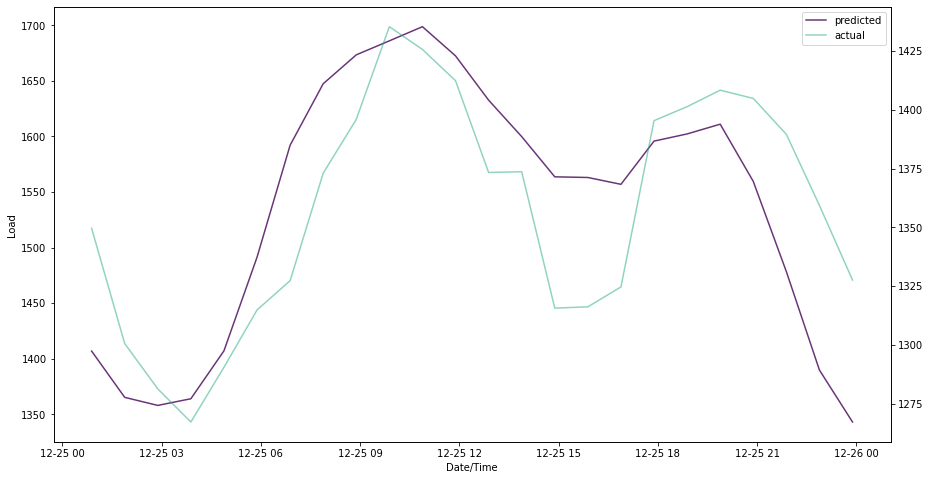

In [30]:
color1 = plt.cm.viridis(1)
color2 = plt.cm.viridis(0.6)

fig, host = plt.subplots(figsize=(15,8))
par = host.twinx()

host.set_xlabel("Date/Time")
host.set_ylabel("Load")

p1, = host.plot(one_hot_train_20191225_df['date'], one_hot_train_20191225_df['pred_inter2'], color=color1, label="predicted", alpha=0.8)
p2, = par.plot(one_hot_train_20191225_df['date'], one_hot_train_20191225_df['mw'], color=color2, label="actual", alpha=0.5)

lns = [p1, p2]

host.legend(handles=lns, loc='best')

### Create a holiday variable in training and test set that flags US federal holidays

In [31]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [32]:
cal = calendar()
holidays = cal.holidays(start=one_hot_train_df['date'].min(), end=test_df['date'].max())
holidays, len(holidays)

(DatetimeIndex(['2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
                '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25',
                '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
                '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12',
                '2018-11-22', '2018-12-25', '2019-01-01', '2019-01-21',
                '2019-02-18', '2019-05-27', '2019-07-04', '2019-09-02',
                '2019-10-14', '2019-11-11', '2019-11-28', '2019-12-25',
                '2020-01-01', '2020-01-20'],
               dtype='datetime64[ns]', freq=None),
 30)

In [33]:
one_hot_train_df['holiday'] = one_hot_train_df['date'].dt.date.isin(holidays.date)
test_df['holiday'] = test_df['date'].dt.date.isin(holidays.date)
one_hot_train_df['holiday'].any(), test_df['holiday'].any()

(True, True)

In [34]:
one_hot_train_df = one_hot_train_df.join(pd.get_dummies(one_hot_train_df['holiday'], prefix='holiday'))
one_hot_train_df.columns

Index(['date', 'HourlyDryBulbTemperature', 'mw', 'hour_of_day', 'day_of_week',
       'month', 'year', 'temp_std', 'load_std', 'temp_sqr',
       ...
       'hod_23_dow_3', 'hod_23_dow_4', 'hod_23_dow_5', 'hod_23_dow_6',
       'yhat_inter2', 'resid_inter2', 'pred_inter2', 'holiday',
       'holiday_False', 'holiday_True'],
      dtype='object', length=301)

### Linear regression model with holiday variable

In [35]:
inter_col_prefixes = ['temp_', 'hod_', 'dow_', 'mo_', 'inter_temp_std_', 'inter_temp_sqr_', 'holiday_']
inter_col_names = [index for index, value in one_hot_train_df.dtypes.items() if is_one_of_col_prefixes(index, inter_col_prefixes)]
len(inter_col_names)

287

In [36]:
train_inter_holi_X = one_hot_train_df[inter_col_names]
model_inter_holi = sm.OLS(one_hot_train_df['load_std'], train_inter_holi_X).fit()

one_hot_train_df['yhat_inter_holi'] = model_inter_holi.fittedvalues
one_hot_train_df['resid_inter_holi'] = model_inter_holi.resid

print_model = model_inter_holi.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               load_std   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1276.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:23:52   Log-Likelihood:                -2941.6
No. Observations:               25536   AIC:                             6383.
Df Residuals:                   25286   BIC:                             8420.
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
temp_std                  0.02

In [37]:
one_hot_train_df['pred_inter_holi'] = (one_hot_train_df['yhat_inter_holi'] * load_std_dev) + load_mean
one_hot_train_df['pred_inter_holi'].head()

0    1341.538504
1    1312.391424
2    1314.097833
3    1323.020081
4    1369.658581
Name: pred_inter_holi, dtype: float64

In [38]:
one_hot_train_20191225_df = one_hot_train_df[(one_hot_train_df['date'] > '2019-12-25') & (one_hot_train_df['date'] < '2019-12-26')]
one_hot_train_20191225_df.shape

(24, 304)

#### Plot of predictions with holiday variable/actual for December 25, 2019

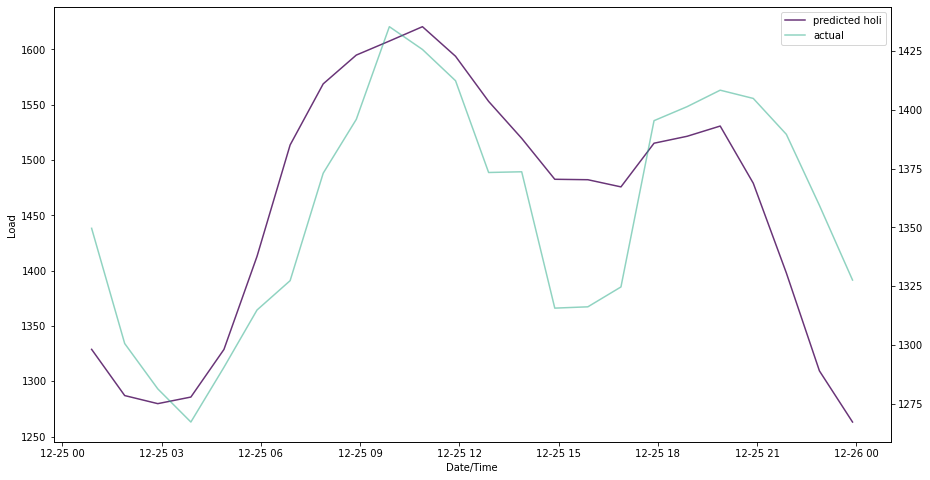

In [39]:
color1 = plt.cm.viridis(1)
color2 = plt.cm.viridis(0.6)

fig, host = plt.subplots(figsize=(15,8))
par = host.twinx()

host.set_xlabel("Date/Time")
host.set_ylabel("Load")

p1, = host.plot(one_hot_train_20191225_df['date'], one_hot_train_20191225_df['pred_inter_holi'], color=color1, label="predicted holi", alpha=0.8)
p2, = par.plot(one_hot_train_20191225_df['date'], one_hot_train_20191225_df['mw'], color=color2, label="actual", alpha=0.5)

lns = [p1, p2]

host.legend(handles=lns, loc='best')

#### Plot of residuals for model with holiday variable

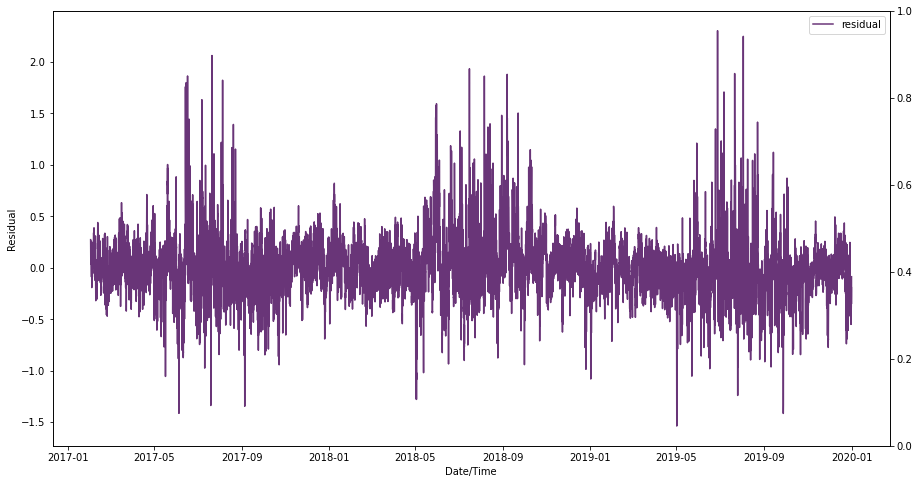

In [40]:
color1 = plt.cm.viridis(1)
color2 = plt.cm.viridis(0.5)

fig, host = plt.subplots(figsize=(15,8))
par = host.twinx()

host.set_xlabel("Date/Time")
host.set_ylabel("Residual")

p1, = host.plot(one_hot_train_df['date'], one_hot_train_df['resid_inter_holi'], color=color1, label="residual", alpha=0.8)
lns = [p1]
host.legend(handles=lns, loc='best')

In [41]:
one_hot_train_2019_Dec_df = one_hot_train_df[(one_hot_train_df['date'] >'2019-12-01') & (one_hot_train_df['date'] <= '2019-12-07')]
one_hot_train_2019_Dec_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
24792 2019-12-01 00:53:00                      37.0  1261.968            0   
24793 2019-12-01 01:53:00                      37.0  1224.070            1   
24794 2019-12-01 02:53:00                      37.0  1209.697            2   
24795 2019-12-01 03:53:00                      38.0  1204.169            3   
24796 2019-12-01 04:53:00                      37.0  1203.950            4   

       day_of_week  month  year  temp_std  load_std  temp_sqr  ...  \
24792            6     12  2019 -0.871499 -1.040266  0.759511  ...   
24793            6     12  2019 -0.871499 -1.172458  0.759511  ...   
24794            6     12  2019 -0.871499 -1.222592  0.759511  ...   
24795            6     12  2019 -0.818504 -1.241874  0.669948  ...   
24796            6     12  2019 -0.871499 -1.242638  0.759511  ...   

       hod_23_dow_6  yhat_inter2  resid_inter2  pred_inter2  holiday  \
24792             0    -0.917280     -0.122987  1297.227059    False   
24793             0    -1.002696     -0.169761  1272.738886    False   
24794             0    -1.073725     -0.148867  1252.375607    False   
24795             0    -1.129735     -0.112139  1236.318087    False   
24796             0    -1.095577     -0.147061  1246.111010    False   

       holiday_False  holiday_True  yhat_inter_holi  resid_inter_holi  \
24792              1             0        -0.916325         -0.123941   
24793              1             0        -1.001911         -0.170547   
24794              1             0        -1.073230         -0.149361   
24795              1             0        -1.129638         -0.112236   
24796              1             0        -1.095299         -0.147339   

       pred_inter_holi  
24792      1297.500594  
24793      1272.964028  
24794      1252.517484  
24795      1236.345968  
24796      1246.190541  

[5 rows x 304 columns]

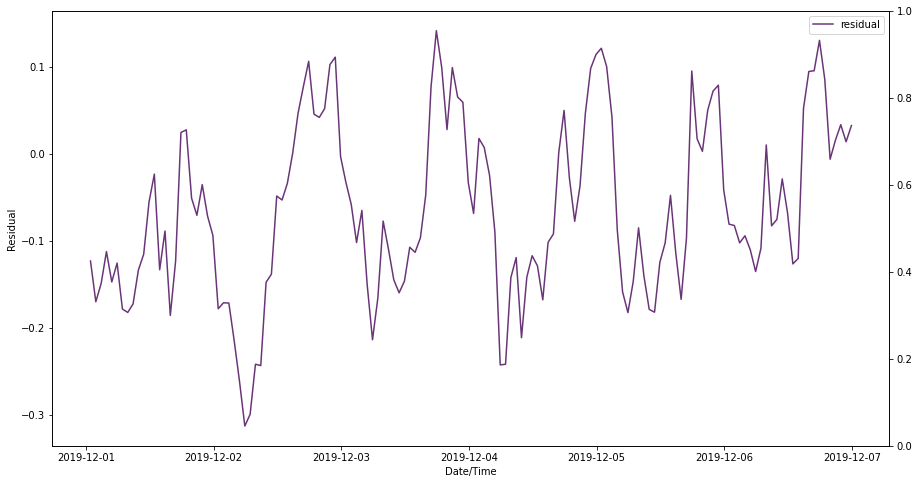

In [40]:
fig, host = plt.subplots(figsize=(15,8))
par = host.twinx()

host.set_xlabel("Date/Time")
host.set_ylabel("Residual")

p1, = host.plot(one_hot_train_2019_Dec_df['date'], one_hot_train_2019_Dec_df['resid_inter2'], color=color1, label="residual", alpha=0.8)
# p2, = par.plot(one_hot_test_df['date'], predictions_test_scaled, color=color2, label="prediction", alpha=0.5)

lns = [p1]
# lns = [p1, p2]

host.legend(handles=lns, loc='best')

Notice that there still appears to be a 24-hour “cycle” to your residuals

### Build an exponential smoothing model on the residuals

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
model_resid_es = ExponentialSmoothing(one_hot_train_df['resid_inter_holi'], trend=None, seasonal='add', seasonal_periods=24).fit()

one_hot_train_df['pred_resid_es'] = model_resid_es.fittedvalues
one_hot_train_df['resid_es'] = model_resid_es.resid

print_model = model_resid_es.summary()
print(print_model)

                       ExponentialSmoothing Model Results                       
Dep. Variable:         resid_inter_holi   No. Observations:                25536
Model:             ExponentialSmoothing   SSE                            434.847
Optimized:                         True   AIC                        -103952.322
Trend:                             None   BIC                        -103740.478
Seasonal:                      Additive   AICC                       -103952.258
Seasonal Periods:                    24   Date:                 Wed, 28 Dec 2022
Box-Cox:                          False   Time:                         21:26:57
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8843401                alpha                 True
smoothing_seasonal       

### calculate the differene between predicted residual and the actual from last model

<AxesSubplot: >

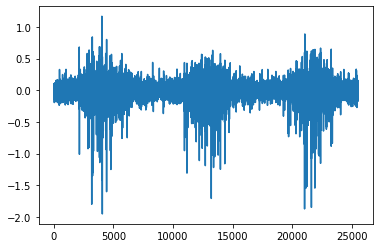

In [46]:
one_hot_train_df['resid_es_pred'] = model_resid_es.predict(start=0)
(one_hot_train_df['resid_es_pred'] - one_hot_train_df['resid_inter_holi']).plot()

### Add the predicted residuals to predictions of energy usage

In [47]:
one_hot_train_df['preds_with_resid_es_pred'] = model_inter_holi.predict(train_inter_holi_X) + one_hot_train_df['resid_es_pred']
one_hot_train_df['preds_with_resid_es_pred']

0       -0.494815
1       -0.591726
2       -0.619862
3       -0.639277
4       -0.515063
           ...   
25531    0.217590
25532    0.008801
25533   -0.208208
25534   -0.399688
25535   -0.597607
Name: preds_with_resid_es_pred, Length: 25536, dtype: float64

#### Plot of forecasted energy usage for December 25, 2019, from final holiday effects model vs actual

In [48]:
one_hot_train_df['pred_scaled_inter_holi_resid_es'] = (one_hot_train_df['preds_with_resid_es_pred'] * load_std_dev) + load_mean
one_hot_train_df['pred_scaled_inter_holi_resid_es'].head()

0    1418.343491
1    1390.560041
2    1382.493882
3    1376.927808
4    1412.538594
Name: pred_scaled_inter_holi_resid_es, dtype: float64

In [49]:
one_hot_train_20191225_df = one_hot_train_df[(one_hot_train_df['date'] > '2019-12-25') & (one_hot_train_df['date'] < '2019-12-26')]
one_hot_train_20191225_df.shape

(24, 309)

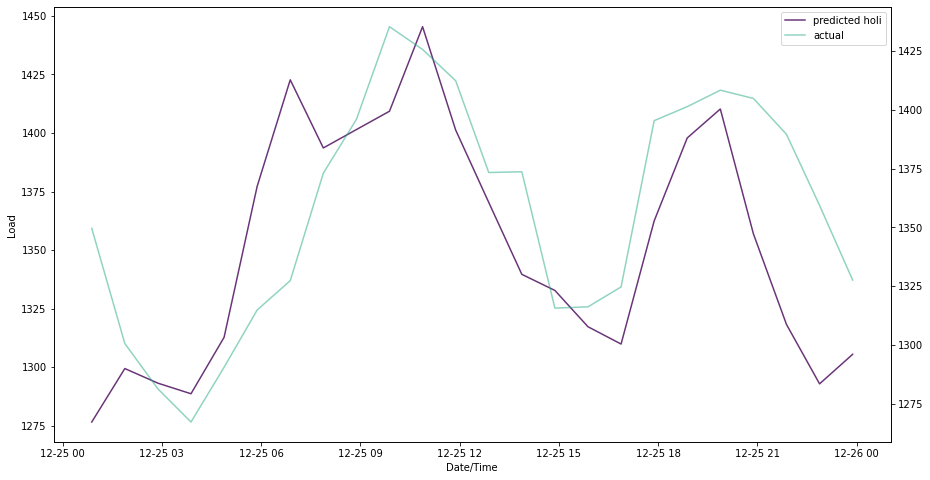

In [50]:
color1 = plt.cm.viridis(1)
color2 = plt.cm.viridis(0.6)

fig, host = plt.subplots(figsize=(15,8))
par = host.twinx()

host.set_xlabel("Date/Time")
host.set_ylabel("Load")

p1, = host.plot(one_hot_train_20191225_df['date'], one_hot_train_20191225_df['pred_scaled_inter_holi_resid_es'], color=color1, label="predicted holi", alpha=0.8)
p2, = par.plot(one_hot_train_20191225_df['date'], one_hot_train_20191225_df['mw'], color=color2, label="actual", alpha=0.5)

lns = [p1, p2]

host.legend(handles=lns, loc='best')

#### Predictions from final linear regression model & MAPE

In [51]:
pred_wresid_es_Y = (one_hot_train_df['preds_with_resid_es_pred'] * load_std_dev) + load_mean

In [52]:
pred_wresid_es_Y.head(), one_hot_train_df['mw'].head(), 

(0    1418.343491
 1    1390.560041
 2    1382.493882
 3    1376.927808
 4    1412.538594
 Name: preds_with_resid_es_pred, dtype: float64,
 0    1419.881
 1    1379.505
 2    1366.106
 3    1364.453
 4    1391.265
 Name: mw, dtype: float64)

In [53]:
error_percent_wresid_es = (one_hot_train_df['mw'] - pred_wresid_es_Y) / one_hot_train_df['mw']
error_percent_wresid_es.head()

0    0.001083
1   -0.008014
2   -0.011996
3   -0.009143
4   -0.015291
dtype: float64

In [54]:
mape_fraction_wresid_es = error_percent_wresid_es.apply(lambda x: abs(x)).sum() / error_percent_wresid_es.count()
mape_wresid_es = mape_fraction_wresid_es * 100

print(f"MAPE of training set on model with residuals exponential smoothing: {mape_wresid_es}")

MAPE of training set on model with residuals exponential smoothing: 1.4902778937571552


### predictions on test data set

In [55]:
# standardize temp, load and add temperature squared column
test_df['temp_std'] = (test_df['HourlyDryBulbTemperature'] - train_df['HourlyDryBulbTemperature'].mean())/train_df['HourlyDryBulbTemperature'].std()
test_df['temp_sqr'] = test_df['temp_std'].apply(lambda x: x * x)
test_df['load_std'] = (test_df['mw'] - train_df['mw'].mean())/train_df['mw'].std()

# one hot encode date
one_hot_test_df = test_df.join(pd.get_dummies(test_df['hour_of_day'], prefix='hod'))
one_hot_test_df = one_hot_test_df.join(pd.get_dummies(one_hot_test_df['day_of_week'], prefix='dow'))
one_hot_test_df = one_hot_test_df.join(pd.get_dummies(one_hot_test_df['month'], prefix='mo'))

one_hot_test_df.head()

date  HourlyDryBulbTemperature        mw  hour_of_day  \
0 2020-01-01 00:53:00                      31.0  1363.428            0   
1 2020-01-01 01:53:00                      29.0  1335.975            1   
2 2020-01-01 02:53:00                      30.0  1296.817            2   
3 2020-01-01 03:53:00                      30.0  1288.403            3   
4 2020-01-01 04:53:00                      31.0  1292.263            4   

   day_of_week  month  year  holiday  temp_std  temp_sqr  ...  hod_22  hod_23  \
0            2      1  2020     True -1.189471  1.414842  ...       0       0   
1            2      1  2020     True -1.295462  1.678223  ...       0       0   
2            2      1  2020     True -1.242467  1.543724  ...       0       0   
3            2      1  2020     True -1.242467  1.543724  ...       0       0   
4            2      1  2020     True -1.189471  1.414842  ...       0       0   

   dow_0  dow_1  dow_2  dow_3  dow_4  dow_5  dow_6  mo_1  
0      0      0      1      0      0      0      0     1  
1      0      0      1      0      0      0      0     1  
2      0      0      1      0      0      0      0     1  
3      0      0      1      0      0      0      0     1  
4      0      0      1      0      0      0      0     1  

[5 rows x 43 columns]

In [56]:
# add interaction between temp and 
interaction_cols = [add_temp_interaction_col(index, one_hot_test_df) for index, value in one_hot_test_df.dtypes.items() if is_one_of_col_prefixes(index, temp_interaction_col_prefixes)]
interaction_cols

[('inter_temp_std_hod_0', 'inter_temp_sqr_hod_0'),
 ('inter_temp_std_hod_1', 'inter_temp_sqr_hod_1'),
 ('inter_temp_std_hod_2', 'inter_temp_sqr_hod_2'),
 ('inter_temp_std_hod_3', 'inter_temp_sqr_hod_3'),
 ('inter_temp_std_hod_4', 'inter_temp_sqr_hod_4'),
 ('inter_temp_std_hod_5', 'inter_temp_sqr_hod_5'),
 ('inter_temp_std_hod_6', 'inter_temp_sqr_hod_6'),
 ('inter_temp_std_hod_7', 'inter_temp_sqr_hod_7'),
 ('inter_temp_std_hod_8', 'inter_temp_sqr_hod_8'),
 ('inter_temp_std_hod_9', 'inter_temp_sqr_hod_9'),
 ('inter_temp_std_hod_10', 'inter_temp_sqr_hod_10'),
 ('inter_temp_std_hod_11', 'inter_temp_sqr_hod_11'),
 ('inter_temp_std_hod_12', 'inter_temp_sqr_hod_12'),
 ('inter_temp_std_hod_13', 'inter_temp_sqr_hod_13'),
 ('inter_temp_std_hod_14', 'inter_temp_sqr_hod_14'),
 ('inter_temp_std_hod_15', 'inter_temp_sqr_hod_15'),
 ('inter_temp_std_hod_16', 'inter_temp_sqr_hod_16'),
 ('inter_temp_std_hod_17', 'inter_temp_sqr_hod_17'),
 ('inter_temp_std_hod_18', 'inter_temp_sqr_hod_18'),
 ('inter_temp

In [57]:
for hod_col in hod_cols:
    for dow_col in dow_cols:
        new_col = add_interaction_col(one_hot_test_df, hod_col, dow_col)
        print(new_col)



hod_0_dow_0
hod_0_dow_1
hod_0_dow_2
hod_0_dow_3
hod_0_dow_4
hod_0_dow_5
hod_0_dow_6
hod_1_dow_0
hod_1_dow_1
hod_1_dow_2
hod_1_dow_3
hod_1_dow_4
hod_1_dow_5
hod_1_dow_6
hod_2_dow_0
hod_2_dow_1
hod_2_dow_2
hod_2_dow_3
hod_2_dow_4
hod_2_dow_5
hod_2_dow_6
hod_3_dow_0
hod_3_dow_1
hod_3_dow_2
hod_3_dow_3
hod_3_dow_4
hod_3_dow_5
hod_3_dow_6
hod_4_dow_0
hod_4_dow_1
hod_4_dow_2
hod_4_dow_3
hod_4_dow_4
hod_4_dow_5
hod_4_dow_6
hod_5_dow_0
hod_5_dow_1
hod_5_dow_2
hod_5_dow_3
hod_5_dow_4
hod_5_dow_5
hod_5_dow_6
hod_6_dow_0
hod_6_dow_1
hod_6_dow_2
hod_6_dow_3
hod_6_dow_4
hod_6_dow_5
hod_6_dow_6
hod_7_dow_0
hod_7_dow_1
hod_7_dow_2
hod_7_dow_3
hod_7_dow_4
hod_7_dow_5
hod_7_dow_6
hod_8_dow_0
hod_8_dow_1
hod_8_dow_2
hod_8_dow_3
hod_8_dow_4
hod_8_dow_5
hod_8_dow_6
hod_9_dow_0
hod_9_dow_1
hod_9_dow_2
hod_9_dow_3
hod_9_dow_4
hod_9_dow_5
hod_9_dow_6
hod_10_dow_0
hod_10_dow_1
hod_10_dow_2
hod_10_dow_3
hod_10_dow_4
hod_10_dow_5
hod_10_dow_6
hod_11_dow_0
hod_11_dow_1
hod_11_dow_2
hod_11_dow_3
hod_11_dow_4
hod_

/tmp/ipykernel_202/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_202/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_202/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

In [58]:
one_hot_test_df = one_hot_test_df.join(pd.get_dummies(one_hot_test_df['holiday'], prefix='holiday'))
one_hot_test_df.columns

Index(['date', 'HourlyDryBulbTemperature', 'mw', 'hour_of_day', 'day_of_week',
       'month', 'year', 'holiday', 'temp_std', 'temp_sqr',
       ...
       'hod_22_dow_6', 'hod_23_dow_0', 'hod_23_dow_1', 'hod_23_dow_2',
       'hod_23_dow_3', 'hod_23_dow_4', 'hod_23_dow_5', 'hod_23_dow_6',
       'holiday_False', 'holiday_True'],
      dtype='object', length=263)

In [59]:
inter_col_names_test = [index for index, value in one_hot_test_df.dtypes.items() if is_one_of_col_prefixes(index, inter_col_prefixes)]

# add zero columns for missing interactions columns (due to only 1 month of data)
cols_to_add = set(inter_col_names) - set(inter_col_names_test)

for col_to_add in cols_to_add:
    one_hot_test_df[col_to_add] = 0

test_X = one_hot_test_df[inter_col_names]
test_X.shape

/tmp/ipykernel_202/2102749054.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_test_df[col_to_add] = 0
/tmp/ipykernel_202/2102749054.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_test_df[col_to_add] = 0
/tmp/ipykernel_202/2102749054.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

(744, 287)

In [60]:
test_predictions = model_inter_holi.predict(test_X)

In [61]:
test_predictions.head(), test_predictions.shape

(0   -0.797519
 1   -0.843790
 2   -0.902152
 3   -0.881362
 4   -0.758594
 dtype: float64,
 (744,))

#### Test set predictions with exponentially smoothed residuals for January 2020

In [62]:
# forecast of residuals for the January 2020
import numpy as np
test_residuals = model_resid_es.forecast(steps=744).reset_index(drop=True)
test_residuals.shape, test_residuals.head()

((744,),
 0   -0.100289
 1   -0.100275
 2   -0.100262
 3   -0.100248
 4   -0.100233
 dtype: float64)

In [63]:
predictions_test_es =  test_predictions + test_residuals
predictions_test_es_scaled = (predictions_test_es * load_std_dev) + load_mean
predictions_test_es_scaled.head()

0    1302.809340
1    1289.547826
2    1272.819802
3    1278.784345
4    1313.984980
dtype: float64

In [64]:
error_percent = (one_hot_test_df['mw'] - predictions_test_es_scaled) / one_hot_test_df['mw']

mape_fraction = error_percent.apply(lambda x: abs(x)).sum() / error_percent.count()
mape = mape_fraction * 100

print(f'MAPE of adjusted exp. smoothing model on test set: {mape}')

MAPE of adjusted exp. smoothing model on test set: 2.65505717792578


#### Refit it to the entire dataset (training and testing combined)

In [65]:
combined_df_col_names = inter_col_names.copy()
combined_df_col_names.append('load_std')
combined_df_col_names.append('mw')

print(len(combined_df_col_names))

train_inter_holi_X = one_hot_train_df[inter_col_names]
train_inter_holi_X.shape, test_X.shape

289


((25536, 287), (744, 287))

In [66]:
combined_df = pd.concat([one_hot_train_df[combined_df_col_names], one_hot_test_df[combined_df_col_names]], ignore_index=True)
combined_df

temp_std  temp_sqr  hod_0  hod_1  hod_2  hod_3  hod_4  hod_5  hod_6  \
0     -0.871499  0.759511      1      0      0      0      0      0      0   
1     -0.871499  0.759511      0      1      0      0      0      0      0   
2     -0.924494  0.854690      0      0      1      0      0      0      0   
3     -0.924494  0.854690      0      0      0      1      0      0      0   
4     -0.924494  0.854690      0      0      0      0      1      0      0   
...         ...       ...    ...    ...    ...    ...    ...    ...    ...   
26275 -1.030485  1.061900      0      0      0      0      0      0      0   
26276 -1.083481  1.173930      0      0      0      0      0      0      0   
26277 -1.083481  1.173930      0      0      0      0      0      0      0   
26278 -1.083481  1.173930      0      0      0      0      0      0      0   
26279 -1.030485  1.061900      0      0      0      0      0      0      0   

       hod_7  ...  hod_23_dow_1  hod_23_dow_2  hod_23_dow_3  hod_23_dow_4  \
0          0  ...             0             0             0             0   
1          0  ...             0             0             0             0   
2          0  ...             0             0             0             0   
3          0  ...             0             0             0             0   
4          0  ...             0             0             0             0   
...      ...  ...           ...           ...           ...           ...   
26275      0  ...             0             0             0             0   
26276      0  ...             0             0             0             0   
26277      0  ...             0             0             0             0   
26278      0  ...             0             0             0             0   
26279      0  ...             0             0             0             1   

       hod_23_dow_5  hod_23_dow_6  holiday_False  holiday_True  load_std  \
0                 0             0              1             0 -0.489452   
1                 0             0              1             0 -0.630287   
2                 0             0              1             0 -0.677024   
3                 0             0              1             0 -0.682790   
4                 0             0              1             0 -0.589267   
...             ...           ...            ...           ...       ...   
26275             0             0              1             0  0.203292   
26276             0             0              1             0  0.072283   
26277             0             0              1             0 -0.051792   
26278             0             0              1             0 -0.283826   
26279             0             0              1             0 -0.540703   

             mw  
0      1419.881  
1      1379.505  
2      1366.106  
3      1364.453  
4      1391.265  
...         ...  
26275  1618.484  
26276  1580.925  
26277  1545.354  
26278  1478.832  
26279  1405.188  

[26280 rows x 289 columns]

In [67]:
model_inter_holi_combined = sm.OLS(combined_df['load_std'], combined_df[inter_col_names]).fit()

combined_df['pred_inter_holi'] = model_inter_holi.fittedvalues
combined_df['resid_inter_holi'] = model_inter_holi.resid

print_model = model_inter_holi_combined.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               load_std   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1304.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:35:33   Log-Likelihood:                -2883.9
No. Observations:               26280   AIC:                             6268.
Df Residuals:                   26030   BIC:                             8312.
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
temp_std                  0.02

In [68]:
one_hot_train_df['pred_inter_holi'] = (combined_df['pred_inter_holi'] * load_std_dev) + load_mean
one_hot_train_df['pred_inter_holi'].head()

0    1341.538504
1    1312.391424
2    1314.097833
3    1323.020081
4    1369.658581
Name: pred_inter_holi, dtype: float64

#### exponential smoothing residual model for combined dataset

In [69]:
model_resid_es_combined = ExponentialSmoothing(combined_df['resid_inter_holi'], trend=None, seasonal='add', seasonal_periods=24).fit()

one_hot_train_df['pred_resid_es'] = model_resid_es_combined.fittedvalues
one_hot_train_df['resid_es'] = model_resid_es_combined.resid

print_model = model_resid_es_combined.summary()
print(print_model)

                       ExponentialSmoothing Model Results                       
Dep. Variable:         resid_inter_holi   No. Observations:                26280
Model:             ExponentialSmoothing   SSE                                nan
Optimized:                         True   AIC                                nan
Trend:                             None   BIC                                nan
Seasonal:                      Additive   AICC                               nan
Seasonal Periods:                    24   Date:                 Wed, 28 Dec 2022
Box-Cox:                          False   Time:                         21:35:49
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0050000                alpha                 True
smoothing_seasonal       

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Forecast out the month of February 2020 with refitted model

In [70]:
# number of hours in February 2020

hours_in_2020_02 = pd.Period('2020-02-12').days_in_month * 24
hours_in_2020_02

696

In [71]:
### Load hourly temperature data for Feb 2020
hr_2020_02_raw_df = pd.read_csv('hr_temp_20200201-20200229_subset.csv', header=0)
hr_2020_02_raw_df.head()

STATION                 DATE REPORT_TYPE  SOURCE  \
0  72520094823  2020-02-01T00:51:00       FM-15       7   
1  72520094823  2020-02-01T01:51:00       FM-15       7   
2  72520094823  2020-02-01T02:51:00       FM-15       7   
3  72520094823  2020-02-01T03:51:00       FM-15       7   
4  72520094823  2020-02-01T04:51:00       FM-15       7   

   HourlyDryBulbTemperature  
0                        32  
1                        32  
2                        32  
3                        32  
4                        31

In [72]:
hr_2020_02_raw_df['date'] = pd.to_datetime(hr_2020_02_raw_df['DATE'])
hr_2020_02_df = hr_2020_02_raw_df.drop(columns=['DATE'])
hr_2020_02_df.head()

STATION REPORT_TYPE  SOURCE  HourlyDryBulbTemperature  \
0  72520094823       FM-15       7                        32   
1  72520094823       FM-15       7                        32   
2  72520094823       FM-15       7                        32   
3  72520094823       FM-15       7                        32   
4  72520094823       FM-15       7                        31   

                 date  
0 2020-02-01 00:51:00  
1 2020-02-01 01:51:00  
2 2020-02-01 02:51:00  
3 2020-02-01 03:51:00  
4 2020-02-01 04:51:00

In [73]:
hr_2020_02_df['hour_of_day'] = hr_2020_02_df['date'].dt.hour
hr_2020_02_df['day_of_week'] = hr_2020_02_df['date'].dt.dayofweek
hr_2020_02_df['month'] = hr_2020_02_df['date'].dt.month
hr_2020_02_df['year'] = hr_2020_02_df['date'].dt.year
hr_2020_02_df = hr_2020_02_df.set_index('date')
hr_2020_02_df.head()

STATION REPORT_TYPE  SOURCE  \
date                                                   
2020-02-01 00:51:00  72520094823       FM-15       7   
2020-02-01 01:51:00  72520094823       FM-15       7   
2020-02-01 02:51:00  72520094823       FM-15       7   
2020-02-01 03:51:00  72520094823       FM-15       7   
2020-02-01 04:51:00  72520094823       FM-15       7   

                     HourlyDryBulbTemperature  hour_of_day  day_of_week  \
date                                                                      
2020-02-01 00:51:00                        32            0            5   
2020-02-01 01:51:00                        32            1            5   
2020-02-01 02:51:00                        32            2            5   
2020-02-01 03:51:00                        32            3            5   
2020-02-01 04:51:00                        31            4            5   

                     month  year  
date                              
2020-02-01 00:51:00      2  2020  
2020-02-01 01:51:00      2  2020  
2020-02-01 02:51:00      2  2020  
2020-02-01 03:51:00      2  2020  
2020-02-01 04:51:00      2  2020

In [74]:
# sanity check the rows with nulls
hr_2020_02_df[hr_2020_02_df['HourlyDryBulbTemperature'].isnull() == True].count()

STATION                     0
REPORT_TYPE                 0
SOURCE                      0
HourlyDryBulbTemperature    0
hour_of_day                 0
day_of_week                 0
month                       0
year                        0
dtype: int64

In [75]:
cal = calendar()
holidays = cal.holidays(start=hr_2020_02_df.index.min(), end=hr_2020_02_df.index.max())
holidays

DatetimeIndex(['2020-02-17'], dtype='datetime64[ns]', freq=None)

In [76]:
hr_2020_02_df['holiday'] = hr_2020_02_df.index.floor(freq='H').isin(holidays.date)
hr_2020_02_df['holiday'].any()

True

In [77]:
hr_2020_02_df = hr_2020_02_df.join(pd.get_dummies(hr_2020_02_df['holiday'], prefix='holiday'))
hr_2020_02_df.columns

Index(['STATION', 'REPORT_TYPE', 'SOURCE', 'HourlyDryBulbTemperature',
       'hour_of_day', 'day_of_week', 'month', 'year', 'holiday',
       'holiday_False', 'holiday_True'],
      dtype='object')

In [78]:
# standardize temp and add temperature squared column
hr_2020_02_df['temp_std'] = (hr_2020_02_df['HourlyDryBulbTemperature'] - train_df['HourlyDryBulbTemperature'].mean())/train_df['HourlyDryBulbTemperature'].std()
hr_2020_02_df['temp_sqr'] = hr_2020_02_df['temp_std'].apply(lambda x: x * x)

# one hot encode date
hr_2020_02_df = hr_2020_02_df.join(pd.get_dummies(hr_2020_02_df['hour_of_day'], prefix='hod'))
hr_2020_02_df = hr_2020_02_df.join(pd.get_dummies(hr_2020_02_df['day_of_week'], prefix='dow'))
hr_2020_02_df = hr_2020_02_df.join(pd.get_dummies(hr_2020_02_df['month'], prefix='mo'))

hr_2020_02_df.head()

STATION REPORT_TYPE  SOURCE  \
date                                                   
2020-02-01 00:51:00  72520094823       FM-15       7   
2020-02-01 01:51:00  72520094823       FM-15       7   
2020-02-01 02:51:00  72520094823       FM-15       7   
2020-02-01 03:51:00  72520094823       FM-15       7   
2020-02-01 04:51:00  72520094823       FM-15       7   

                     HourlyDryBulbTemperature  hour_of_day  day_of_week  \
date                                                                      
2020-02-01 00:51:00                        32            0            5   
2020-02-01 01:51:00                        32            1            5   
2020-02-01 02:51:00                        32            2            5   
2020-02-01 03:51:00                        32            3            5   
2020-02-01 04:51:00                        31            4            5   

                     month  year  holiday  holiday_False  ...  hod_22  hod_23  \
date                                                      ...                   
2020-02-01 00:51:00      2  2020    False              1  ...       0       0   
2020-02-01 01:51:00      2  2020    False              1  ...       0       0   
2020-02-01 02:51:00      2  2020    False              1  ...       0       0   
2020-02-01 03:51:00      2  2020    False              1  ...       0       0   
2020-02-01 04:51:00      2  2020    False              1  ...       0       0   

                     dow_0  dow_1  dow_2  dow_3  dow_4  dow_5  dow_6  mo_2  
date                                                                        
2020-02-01 00:51:00      0      0      0      0      0      1      0     1  
2020-02-01 01:51:00      0      0      0      0      0      1      0     1  
2020-02-01 02:51:00      0      0      0      0      0      1      0     1  
2020-02-01 03:51:00      0      0      0      0      0      1      0     1  
2020-02-01 04:51:00      0      0      0      0      0      1      0     1  

[5 rows x 45 columns]

In [79]:
# add interaction between temp and 
interaction_cols = [add_temp_interaction_col(index, hr_2020_02_df) for index, value in hr_2020_02_df.dtypes.items() if is_one_of_col_prefixes(index, temp_interaction_col_prefixes)]
interaction_cols

[('inter_temp_std_hod_0', 'inter_temp_sqr_hod_0'),
 ('inter_temp_std_hod_1', 'inter_temp_sqr_hod_1'),
 ('inter_temp_std_hod_2', 'inter_temp_sqr_hod_2'),
 ('inter_temp_std_hod_3', 'inter_temp_sqr_hod_3'),
 ('inter_temp_std_hod_4', 'inter_temp_sqr_hod_4'),
 ('inter_temp_std_hod_5', 'inter_temp_sqr_hod_5'),
 ('inter_temp_std_hod_6', 'inter_temp_sqr_hod_6'),
 ('inter_temp_std_hod_7', 'inter_temp_sqr_hod_7'),
 ('inter_temp_std_hod_8', 'inter_temp_sqr_hod_8'),
 ('inter_temp_std_hod_9', 'inter_temp_sqr_hod_9'),
 ('inter_temp_std_hod_10', 'inter_temp_sqr_hod_10'),
 ('inter_temp_std_hod_11', 'inter_temp_sqr_hod_11'),
 ('inter_temp_std_hod_12', 'inter_temp_sqr_hod_12'),
 ('inter_temp_std_hod_13', 'inter_temp_sqr_hod_13'),
 ('inter_temp_std_hod_14', 'inter_temp_sqr_hod_14'),
 ('inter_temp_std_hod_15', 'inter_temp_sqr_hod_15'),
 ('inter_temp_std_hod_16', 'inter_temp_sqr_hod_16'),
 ('inter_temp_std_hod_17', 'inter_temp_sqr_hod_17'),
 ('inter_temp_std_hod_18', 'inter_temp_sqr_hod_18'),
 ('inter_temp

In [80]:
for hod_col in hod_cols:
    for dow_col in dow_cols:
        new_col = add_interaction_col(hr_2020_02_df, hod_col, dow_col)
        print(new_col)

hod_0_dow_0
hod_0_dow_1
hod_0_dow_2
hod_0_dow_3
hod_0_dow_4
hod_0_dow_5
hod_0_dow_6
hod_1_dow_0
hod_1_dow_1
hod_1_dow_2
hod_1_dow_3
hod_1_dow_4
hod_1_dow_5
hod_1_dow_6
hod_2_dow_0
hod_2_dow_1
hod_2_dow_2
hod_2_dow_3
hod_2_dow_4
hod_2_dow_5
hod_2_dow_6
hod_3_dow_0
hod_3_dow_1
hod_3_dow_2
hod_3_dow_3
hod_3_dow_4
hod_3_dow_5
hod_3_dow_6
hod_4_dow_0
hod_4_dow_1
hod_4_dow_2
hod_4_dow_3
hod_4_dow_4
hod_4_dow_5
hod_4_dow_6
hod_5_dow_0
hod_5_dow_1
hod_5_dow_2
hod_5_dow_3
hod_5_dow_4
hod_5_dow_5
hod_5_dow_6
hod_6_dow_0
hod_6_dow_1
hod_6_dow_2
hod_6_dow_3
hod_6_dow_4
hod_6_dow_5
hod_6_dow_6
hod_7_dow_0
hod_7_dow_1
hod_7_dow_2
hod_7_dow_3
hod_7_dow_4
hod_7_dow_5
hod_7_dow_6
hod_8_dow_0
hod_8_dow_1
hod_8_dow_2
hod_8_dow_3
hod_8_dow_4
hod_8_dow_5
hod_8_dow_6
hod_9_dow_0
hod_9_dow_1
hod_9_dow_2
hod_9_dow_3
hod_9_dow_4
hod_9_dow_5
hod_9_dow_6
hod_10_dow_0
hod_10_dow_1
hod_10_dow_2
hod_10_dow_3
hod_10_dow_4
hod_10_dow_5
hod_10_dow_6
hod_11_dow_0
hod_11_dow_1
hod_11_dow_2
hod_11_dow_3
hod_11_dow_4
hod_

/tmp/ipykernel_202/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_202/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df[left_col_name] * df[right_col_name]
/tmp/ipykernel_202/959466605.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

In [81]:
inter_col_names_2020_02 = [index for index, value in hr_2020_02_df.dtypes.items() if is_one_of_col_prefixes(index, inter_col_prefixes)]

# add zero columns for missing interactions columns (due to only 1 month of data)
cols_to_add = set(inter_col_names) - set(inter_col_names_2020_02)

for col_to_add in cols_to_add:
    hr_2020_02_df[col_to_add] = 0
    

/tmp/ipykernel_202/3201812627.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hr_2020_02_df[col_to_add] = 0
/tmp/ipykernel_202/3201812627.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hr_2020_02_df[col_to_add] = 0
/tmp/ipykernel_202/3201812627.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy(

In [82]:
hr_2020_02_df.dtypes

STATION                      int64
REPORT_TYPE                 object
SOURCE                       int64
HourlyDryBulbTemperature     int64
hour_of_day                  int64
                             ...  
mo_7                         int64
inter_temp_sqr_mo_3          int64
inter_temp_std_mo_7          int64
mo_6                         int64
mo_1                         int64
Length: 296, dtype: object

In [83]:
hr_2020_02_X = hr_2020_02_df[inter_col_names]
hr_2020_02_X.shape

(696, 287)

In [84]:
predictions_2020_02 = model_inter_holi.predict(hr_2020_02_X)
pred_residuals_2020_02 = model_resid_es.forecast(steps=hours_in_2020_02).reset_index(drop=True)
pred_residuals_2020_02.index = predictions_2020_02.index
predictions_2020_02, pred_residuals_2020_02

(date
 2020-02-01 00:51:00   -0.668208
 2020-02-01 01:51:00   -0.771863
 2020-02-01 02:51:00   -0.852740
 2020-02-01 03:51:00   -0.867959
 2020-02-01 04:51:00   -0.810458
                          ...   
 2020-02-29 19:51:00    0.401027
 2020-02-29 20:51:00    0.309832
 2020-02-29 21:51:00    0.165249
 2020-02-29 22:51:00   -0.003321
 2020-02-29 23:51:00   -0.208895
 Length: 696, dtype: float64,
 date
 2020-02-01 00:51:00   -0.100289
 2020-02-01 01:51:00   -0.100275
 2020-02-01 02:51:00   -0.100262
 2020-02-01 03:51:00   -0.100248
 2020-02-01 04:51:00   -0.100233
                          ...   
 2020-02-29 19:51:00   -0.100017
 2020-02-29 20:51:00   -0.100001
 2020-02-29 21:51:00   -0.099988
 2020-02-29 22:51:00   -0.099972
 2020-02-29 23:51:00   -0.099959
 Length: 696, dtype: float64)

In [85]:
hr_2020_02_df['preds_with_residuals'] = predictions_2020_02 + pred_residuals_2020_02
hr_2020_02_df['preds_with_residuals_scaled'] = (hr_2020_02_df['preds_with_residuals'] * load_std_dev) + load_mean
hr_2020_02_df['preds_with_residuals_scaled']

date
2020-02-01 00:51:00    1339.881595
2020-02-01 01:51:00    1310.168567
2020-02-01 02:51:00    1286.985828
2020-02-01 03:51:00    1282.626780
2020-02-01 04:51:00    1299.115888
                          ...     
2020-02-29 19:51:00    1646.498918
2020-02-29 20:51:00    1620.358651
2020-02-29 21:51:00    1578.911777
2020-02-29 22:51:00    1530.589222
2020-02-29 23:51:00    1471.656733
Name: preds_with_residuals_scaled, Length: 696, dtype: float64

#### Plot predictions from chosen model with exponential smoothing residuals added for Feb 2020

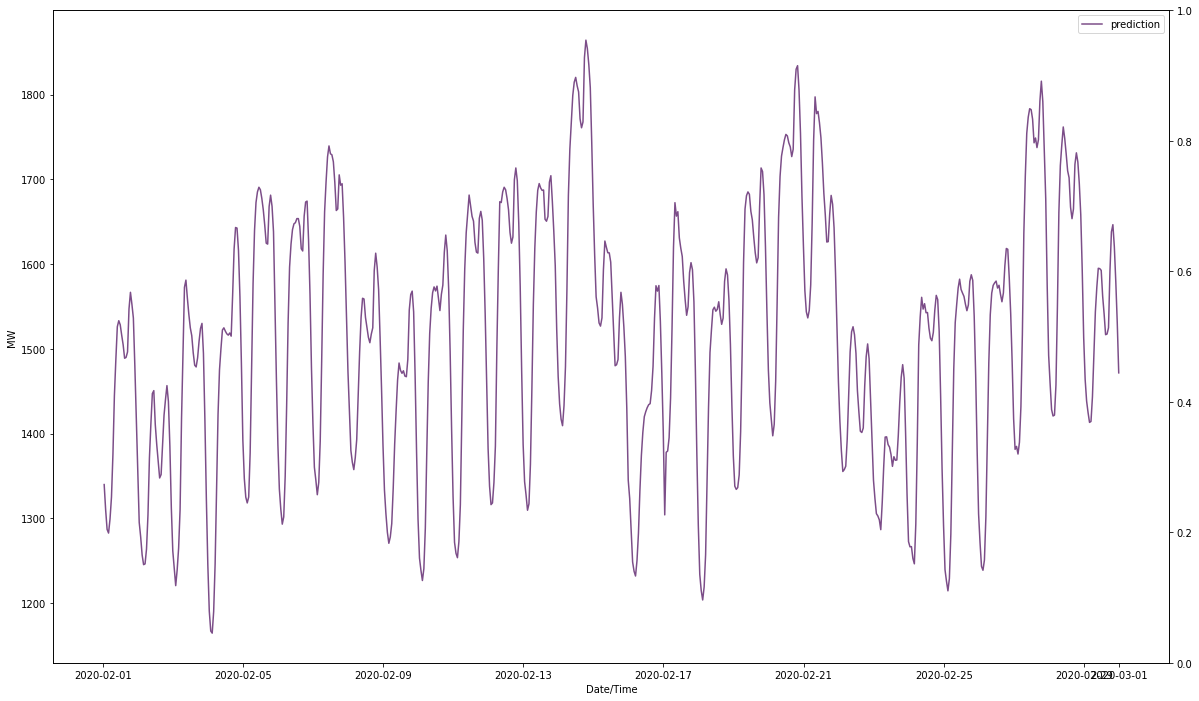

In [86]:
color1 = plt.cm.viridis(1)
color2 = plt.cm.viridis(0.33)
color3 = plt.cm.viridis(0.66)

fig, host = plt.subplots(figsize=(20,12))
par = host.twinx()

host.set_xlabel("Date/Time")
host.set_ylabel("MW")

p1, = host.plot(hr_2020_02_df.index, hr_2020_02_df['preds_with_residuals_scaled'], color=color1, label="prediction", alpha=0.7)

lns = [p1]
host.legend(handles=lns, loc='best')

In [91]:
print(f'MAPE of adjusted exp. smoothing model on test set: {mape}')
max_load_2020_02 = hr_2020_02_df['preds_with_residuals_scaled'].max()
print(max_load_2020_02)

hr_2020_02_df[hr_2020_02_df['preds_with_residuals_scaled'] == max_load_2020_02].index

MAPE of adjusted exp. smoothing model on test set: 2.65505717792578
1864.2268927407126


DatetimeIndex(['2020-02-14 18:51:00'], dtype='datetime64[ns]', name='date', freq=None)

### Report to executive

MAPE on the testing dataset of `2.65` is low enough for a reliable forecast.

The peak load for energy during month of February `1864.22` is expected to occur on `2020-02-14 18:00`.